# Chapter 2
In this notebook We demonstrate, optimizing adaptive Exponential Model and an Izhikitich model
against simulated firing rate and waveform shape data, using the Allen SDK to do spike train statistics and waveform feature extraction.

import warnings
warnings.filterwarnings("ignore")

# Set up environment:
In the cells below we load data, and set up an environment that supports visualizing optimization outputs.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.plot([0],[1])
plt.show()
import warnings
warnings.filterwarnings("ignore")

<Figure size 640x480 with 1 Axes>

In [2]:
from neuronunit.optimisation.data_transport_container import DataTC

In [3]:
%%capture
from allensdk.ephys.extract_cell_features import extract_cell_features
import pickle
from neuronunit.optimisation.optimization_management import OptMan, TSD
from neuronunit.optimisation import model_parameters
from neuronunit.optimisation.model_parameters import MODEL_PARAMS
import pandas as pd

try:
    #assert 1==2
    with open('jd.p','rb') as f:
        res = pickle.load(f)

except:
    try:
        with open('allen_test_data.p','rb') as f:
            pre_obs = pickle.load(f)    
    except:
        from neuronunit.tests.allen_tests import pre_obs#, test_collection   
        with open('allen_test_data.p','wb') as f:
            pickle.dump(pre_obs,f)

    local_tests = pre_obs[2][1]
    local_tests.update(pre_obs[2][1]['spikes'][0])
    local_tests['current_test'] = pre_obs[1][0]
    spk = local_tests['spk_count'] = len(pre_obs[2][1]['spikes'])+10
    spk_range = [spk-6,spk+6]
    OM = OptMan(local_tests,protocol={'elephant':False,'allen':True,'dm':False,'tsr':spk_range})
    res = OM.round_trip_test(local_tests,str('RAW'),MU=10,NGEN=20)#,stds = easy_standards)

    with open('jd.p','wb') as f:
        pickle.dump(res,f)


/Users/rjjarvis/git/safe/neuronunit/neuronunit/optimisation/optimization_management.py:9: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/anaconda3/lib

consider installing pynn a heavier backend
glif python Error
False
9
[[50, 0.01, -2, -60, 10], [50, 0.01, -2, -40, 150], [50, 0.03, 15, -60, 150], [200, 0.01, -2, -60, 150], [200, 0.01, 15, -60, 10], [200, 0.03, -2, -60, 10], [200, 0.03, 15, -40, 150], [50, 0.01, -2, -60, 10], [50, 0.01, -2, -60, 10]]
[[50, 0.01, -2, -59.95122090561141, 146.2674084203412], [55.63387540781839, 0.01, -2, -40.04877909438859, 13.732591579658802], [50, 0.03, 14.70569233876996, -60, 150], [200.0, 0.01, -1.7056923387699605, -60, 150], [200, 0.01095625167853512, 14.789806087839715, -60, 10], [200, 0.02904374832146488, -1.7898060878397146, -60, 10], [50.21906518136801, 0.02974408340927088, 15, -40, 11.156527141912335], [199.78093481863198, 0.01025591659072912, -2, -60, 148.84347285808767], [50, 0.01, -2, -60, 10]]
[[50, 0.01, -2, -59.95122090561141, 146.2674084203412], [55.63387540781839, 0.01, -2, -40.04877909438859, 13.732591579658802], [50, 0.03, 14.70569233876996, -60, 150], [200.0, 0.01, -1.705692338769960

[[50, 0.03, 15, -59.501795077122445, 150], [200, 0.03, 15, -40.498204922877555, 150], [200, 0.02905743951717899, 14.115587724385094, -40.24374763526512, 150.0], [177.9475528839574, 0.029971229437417816, -1.0280163043171253, -59.75625236473488, 10], [199.78219907989393, 0.0101850735868965, -1.4338838196031858, -59.999610163062265, 12.587308571670036], [50, 0.011097703693107799, -1.0563549243101447, -59.99982519367408, 148.16934688083336], [55.60357714007135, 0.03, 15, -40.36514232961742, 150], [194.39642285992863, 0.03, 15, -59.289881286709935, 150], [196.2112980061028, 0.01034731954910335, -1.0066417252605613, -59.998873173195115, 18.198698576101016], [50, 0.010189038447049954, 1.4863345963181898, -59.99982939720001, 149.79671001104185]]
[[50, 0.03, 15, -59.501795077122445, 150], [200, 0.03, 15, -40.498204922877555, 150], [200, 0.02905743951717899, 14.115587724385094, -40.24374763526512, 150.0], [177.9475528839574, 0.029971229437417816, -1.0280163043171253, -59.75625236473488, 10], [19

[[200, 0.03, 15, -40, 150], [200, 0.03, 14.737959768977312, -40.0, 150], [52.86149250332193, 0.02904374832146488, -1.0667324734363204, -59.42110751867127, 10], [197.13850749667807, 0.03, 13.752886520290655, -59.99998361807162, 150.0], [198.15236559572674, 0.010125075267102237, -1.0544163767848662, -59.99982519367408, 12.053624275560935], [57.329587981033484, 0.011157952207297232, -1.407175912993657, -59.999610163062265, 147.25174076947403], [52.877481501907496, 0.02999802366225762, 14.678307149569946, -40.33666002935105, 150], [197.1733306591235, 0.02973209131513467, 14.997178097394642, -59.854133478461925, 144.49339448859826], [53.186472061898485, 0.01091517792956506, 1.5114535297102887, -60, 10.0], [196.81332027874228, 0.010252625549743717, -0.9023692554108357, -59.50357933656583, 148.5210356336436]]
[[200, 0.03, 15, -40, 150], [200, 0.03, 14.737959768977312, -40.0, 150], [52.86149250332193, 0.02904374832146488, -1.0667324734363204, -59.42110751867127, 10], [197.13850749667807, 0.03,

[[200, 0.03, 15, -40, 150], [200.0, 0.03, 15, -40, 150.0], [197.10429204162273, 0.029990164003740688, -1.313171863409984, -60, 21.187566874038318], [50, 0.029035802780902245, 12.774732420898172, -59.9382006500803, 146.73137307037297], [50, 0.010180494054548654, -1.0585704678326455, -59.999820616556946, 148.16934688083336], [199.78229859670088, 0.011102295872440864, -1.4030218219458779, -59.395111656959244, 10.036811685723418], [50.47222859069425, 0.03, 15, -40.36514232961742, 150], [199.78219907989393, 0.02972397823953874, 14.681886372285607, -59.999610163062265, 149.98071372751704], [52.55514190172988, 0.010215295331360145, 1.5068309930983417, -59.508701312476184, 10.014271191629433], [197.4446903343594, 0.010952507644875742, -0.8977466826857641, -59.98698537751504, 149.96935359610194]]
[[200, 0.03, 15, -40, 150], [200.0, 0.03, 15, -40, 150.0], [197.10429204162273, 0.029990164003740688, -1.313171863409984, -60, 21.187566874038318], [50, 0.029035802780902245, 12.774732420898172, -59.93

In [4]:
try:
    results,converged,target,simulated_tests,tsr = res
except:
    results,converged,target,simulated_tests = res

results['pf'][0].dtc




# Load data for other optimized model
Specifically, load data for the adaptive exponential cells.

In [ ]:
try:
    assert 1==2
    with open('similar.p','rb') as f:
        similar = pickle.load(f)

except:
    sim_tests = TSD(simulated_tests)
    backend = str('ADEXP')
    similar = sim_tests.optimize(model_parameters.MODEL_PARAMS[backend], NGEN=30, \
                                 backend=backend, MU=12, protocol={'allen': True, 'elephant': False,'tsr':results['dtc_pop'][0].tsr})

    with open('similar.p','wb') as f:
        pickle.dump(similar[0]['dtc_pop'],f)


False
8
[[87.5, 0.4375, 0.875, -30, 0.4375, 4.375, -43.75, 1.75, 6.125, -44.625, -70, 0.07875, 0.01], [87.5, 0.4375, 1.125, -30, 0.4375, 5.625, -43.75, 1.75, 7.875, -44.625, -70, 0.10124999999999999, 0.01], [87.5, 0.5625, 0.875, -30, 0.03125, 4.375, -43.75, 0.25, 6.125, -44.625, -70, 0.07875, 0.01], [87.5, 0.5625, 1.125, -30, 0.03125, 5.625, -43.75, 0.25, 7.875, -44.625, -70, 0.10124999999999999, 0.01], [112.5, 0.4375, 0.875, -30, 0.4375, 4.375, -56.25, 1.75, 6.125, -57.375, -70, 0.07875, 0.01], [112.5, 0.4375, 1.125, -30, 0.4375, 5.625, -56.25, 1.75, 7.875, -57.375, -70, 0.10124999999999999, 0.01], [112.5, 0.5625, 0.875, -30, 0.03125, 4.375, -56.25, 0.25, 6.125, -57.375, -70, 0.07875, 0.01], [112.5, 0.5625, 1.125, -30, 0.03125, 5.625, -56.25, 0.25, 7.875, -57.375, -70, 0.10124999999999999, 0.06]]
[[87.5, 0.4375, 0.875, -30, 0.4375, 4.388995568860105, -43.75, 1.75, 6.125, -44.625, -70, 0.10124221658105381, 0.01], [87.5, 0.4375, 1.125, -30, 0.4375, 5.611004431139895, -43.75, 1.75, 7.875

In [20]:
#similar[1]
#similar[0]

In [21]:
dtcpop = similar[0]['dtc_pop']
for d in dtcpop:
    print(d.ampl)
#similar[0]['pf'][0]

847.0684289932251 pA
439.9976134300232 pA
439.9976134300232 pA
67.03125 pA
66.171875 pA
843.0853486061096 pA
407.867431640625 pA
33.658854166666664 pA
290.0390625 pA


In [22]:
from neuronunit.optimisation.optimization_management import inject_and_plot, nuunit_allen_evaluation, prediction_current_and_features

print(dtcpop[0].spike_number)
print(dtcpop[1].spike_number)
print(dtcpop[2].spike_number)
print(target.spike_number)

13
14
14
12


# Same model simulated data/Optimized model
In the cell below you can see that when a model is optimized to match data that was simulated using the same model, the spike train statistics are a good fit.

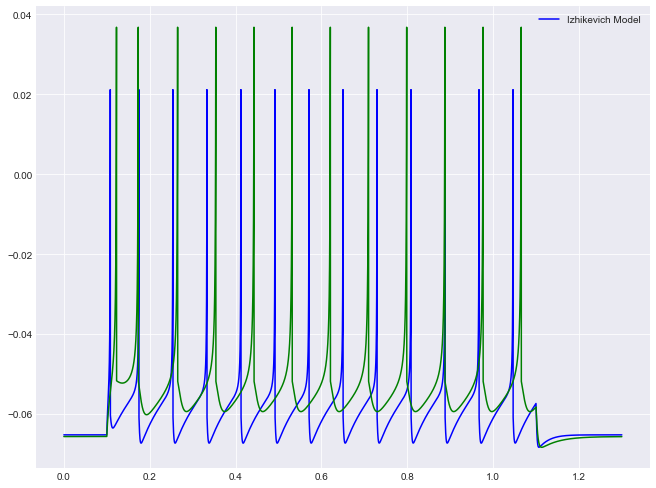

13
12


In [23]:
vm = inject_and_plot([results['pf'][0].dtc],second_pop=[results['pf'][0].dtc],third_pop=[target],snippets=False)#,second_pop=[results['dtc_pop']],third_pop=converged,snippets=False)
print(results['pf'][0].dtc.spike_number)
print(target.spike_number)


# Different model simulated data/Optimized model
In the cell below you can see that when a model is optimized to match data that was simulated using a different  model, the spike train statistics are an okay good fit. It's likely that with more intensive application of optimization algorithm, that the observation prediction agreement would be much better.

In [1]:
vm = inject_and_plot(dtcpop[0:2],second_pop=[target],third_pop=dtcpop[0:2],snippets=False)#,second_pop=[results['dtc_pop']],third_pop=converged,snippets=False)


NameError: name 'inject_and_plot' is not defined

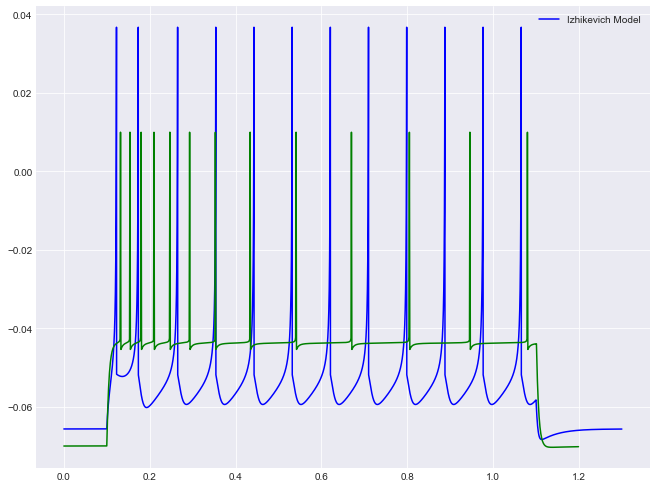

In [25]:
vm = inject_and_plot([dtcpop[0]],second_pop=[target],third_pop=[dtcpop[0]],snippets=False)#,second_pop=[results['dtc_pop']],third_pop=converged,snippets=False)


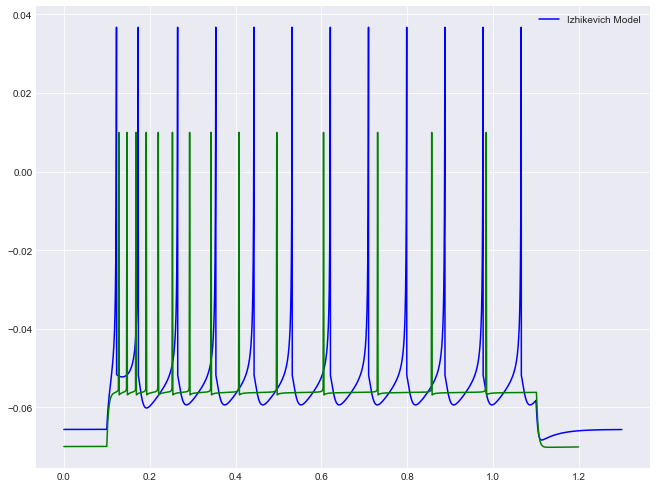

In [26]:
vm = inject_and_plot([dtcpop[1]],second_pop=[target],third_pop=[dtcpop[1]],snippets=False)#,second_pop=[results['dtc_pop']],third_pop=converged,snippets=False)


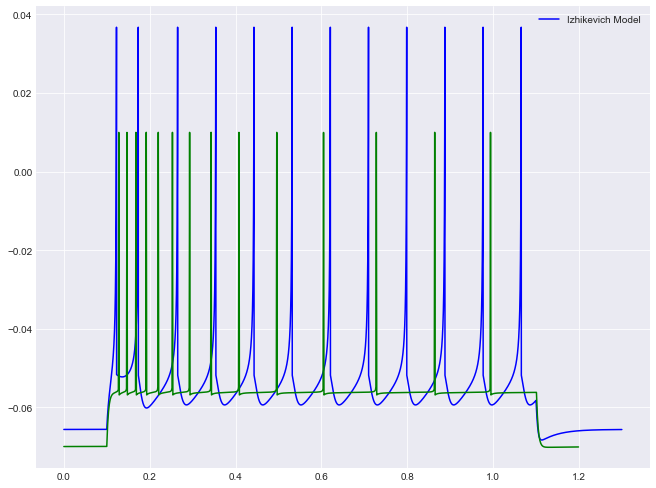

In [27]:
vm = inject_and_plot([dtcpop[2]],second_pop=[target],third_pop=[dtcpop[2]],snippets=False)#,second_pop=[results['dtc_pop']],third_pop=converged,snippets=False)


In [11]:
dfpt = pd.DataFrame([target.preds])
dfpt.T

,0
adapt,"{'mean': 0.07926230393325748, 'std': 10.0}"
adp_index,"{'mean': 0.07926230393325748, 'std': 10.0}"
adp_t,"{'mean': 0.07926230393325748, 'std': 10.0}"
adp_v,"{'mean': 0.07926230393325748, 'std': 10.0}"
avg_rate,"{'mean': 0.07926230393325748, 'std': 10.0}"
clipped,"{'mean': 0.07926230393325748, 'std': 10.0}"
current,{'mean': 0.2864583333333333 pA}
downstroke,"{'mean': 0.07926230393325748, 'std': 10.0}"
downstroke_index,"{'mean': 0.07926230393325748, 'std': 10.0}"
downstroke_t,"{'mean': 0.07926230393325748, 'std': 10.0}"


In [12]:
dfp1 = pd.DataFrame([results['pf'][0].dtc.preds])
dfp1.T
#dir(results['pf'][0].dtc.tests['adapt'])
#print(results['pf'][0].dtc.tests['adapt'].score_type)

,0
adapt,"{'mean': 0.19823085576034102, 'std': 0.0132153..."
adp_index,"{'mean': 0.19823085576034102, 'std': 0.0132153..."
adp_t,"{'mean': 0.19823085576034102, 'std': 0.0132153..."
adp_v,"{'mean': 0.19823085576034102, 'std': 0.0132153..."
avg_rate,"{'mean': 0.19823085576034102, 'std': 0.0132153..."
clipped,"{'mean': 0.19823085576034102, 'std': 0.0132153..."
current,"{'mean': 0.19823085576034102, 'std': 0.0132153..."
downstroke,"{'mean': 0.19823085576034102, 'std': 0.0132153..."
downstroke_index,"{'mean': 0.19823085576034102, 'std': 0.0132153..."
downstroke_t,"{'mean': 0.19823085576034102, 'std': 0.0132153..."


In [13]:
from sciunit import scores
scores.RatioScore
for k,v in results['pf'][0].dtc.tests.items():
    v.score_type = scores.RatioScore
    res_score = results['pf'][0].dtc.judge_test(v)
res_score    
    

{'adapt': {'mean': 0.19823085576034102, 'std': 0.013215390384022734},
 'latency': {'mean': 0.19823085576034102, 'std': 0.013215390384022734},
 'isi_cv': {'mean': 0.19823085576034102, 'std': 0.013215390384022734},
 'mean_isi': {'mean': 0.19823085576034102, 'std': 0.013215390384022734},
 'median_isi': {'mean': 0.19823085576034102, 'std': 0.013215390384022734},
 'first_isi': {'mean': 0.19823085576034102, 'std': 0.013215390384022734},
 'avg_rate': {'mean': 0.19823085576034102, 'std': 0.013215390384022734},
 'threshold_index': {'mean': 0.19823085576034102, 'std': 0.013215390384022734},
 'clipped': {'mean': 0.19823085576034102, 'std': 0.013215390384022734},
 'threshold_t': {'mean': 0.19823085576034102, 'std': 0.013215390384022734},
 'threshold_v': {'mean': 0.19823085576034102, 'std': 0.013215390384022734},
 'peak_index': {'mean': 0.19823085576034102, 'std': 0.013215390384022734},
 'peak_t': {'mean': 0.19823085576034102, 'std': 0.013215390384022734},
 'peak_v': {'mean': 0.19823085576034102, '

In [14]:
import pandas as pd
df = pd.DataFrame([dtcpop[0].scores])
df1 = pd.DataFrame([results['pf'][0].dtc.scores])
df = df.append(df1)
          
df.T

,0,0
adapt,0.385325,1.000000
adp_index,1.000000,1.000000
adp_t,1.000000,1.000000
adp_v,1.000000,1.000000
avg_rate,1.000000,1.000000
clipped,1.000000,1.000000
current,1.000000,1.000000
downstroke,1.000000,1.000000
downstroke_index,1.000000,1.000000
downstroke_t,1.000000,1.000000
